# Data Dictionnary
**Goal** : understand the motor vehicle thefts in Chicago. Here is a list of descriptions of the variables:

    ID: a unique identifier for each observation
    Date: the date the crime occurred
    LocationDescription: the location where the crime occurred
    Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)
    Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)
    Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
    District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
    CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
    Year: the year in which the crime occurred.
    Latitude: the latitude of the location at which the crime occurred.
    Longitude: the longitude of the location at which the crime occurred.


In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17765378936517482664, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17779732781471868904
 physical_device_desc: "device: XLA_CPU device"]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install feature-engine

     |████████████████████████████████| 9.5MB 17.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Import Libraries

In [4]:
#Import useful packages
import pandas as pd  
import numpy as np  
import math
import matplotlib.pyplot as plt  
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

pd.options.display.max_columns= None


# Data Exploration

In [23]:
#Read data
data=pd.read_csv('/content/drive/My Drive/AE_PJ/mvtWeek1.csv',parse_dates=['Date'],low_memory=False,index_col='Date')
data.head()

,ID,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
Date,,,,,,,,,,
2012-12-31 23:15:00,8951354,STREET,False,False,623,6,69,2012,41.756284,-87.621645
2012-12-31 22:00:00,8951141,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2012-12-31 22:00:00,8952745,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
2012-12-31 22:00:00,8952223,STREET,False,False,724,7,67,2012,41.769329,-87.657726
2012-12-31 21:30:00,8951608,STREET,False,False,211,2,35,2012,41.837568,-87.621761


In [24]:
data

,ID,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
Date,,,,,,,,,,
2012-12-31 23:15:00,8951354,STREET,False,False,623,6,69,2012,41.756284,-87.621645
2012-12-31 22:00:00,8951141,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2012-12-31 22:00:00,8952745,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
2012-12-31 22:00:00,8952223,STREET,False,False,724,7,67,2012,41.769329,-87.657726
2012-12-31 21:30:00,8951608,STREET,False,False,211,2,35,2012,41.837568,-87.621761
...,...,...,...,...,...,...,...,...,...,...
2001-01-01 00:05:00,1310068,STREET,False,False,1123,NaN,NaN,2001,41.887566,-87.711323
2001-01-01 00:01:00,1313404,STREET,False,False,2023,NaN,NaN,2001,41.981924,-87.658878
2001-01-01 00:01:00,1313442,STREET,False,False,911,NaN,NaN,2001,41.799024,-87.696538


In [25]:
data.info

<bound method DataFrame.info of                           ID            LocationDescription  Arrest  Domestic  \
Date                                                                            
2012-12-31 23:15:00  8951354                         STREET   False     False   
2012-12-31 22:00:00  8951141                         STREET   False     False   
2012-12-31 22:00:00  8952745  RESIDENTIAL YARD (FRONT/BACK)   False     False   
2012-12-31 22:00:00  8952223                         STREET   False     False   
2012-12-31 21:30:00  8951608                         STREET   False     False   
...                      ...                            ...     ...       ...   
2001-01-01 00:05:00  1310068                         STREET   False     False   
2001-01-01 00:01:00  1313404                         STREET   False     False   
2001-01-01 00:01:00  1313442                         STREET   False     False   
2001-01-01 00:01:00  1563324                         STREET   False     False

In [26]:
data.describe(include='all')

,ID,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
count,1.916410e+05,191641,191641,191641,191641.000000,148589,167038,191641.000000,189365.000000,189365.000000
unique,NaN,78,2,2,NaN,27,79,NaN,NaN,NaN
top,NaN,STREET,False,False,NaN,8,25,NaN,NaN,NaN
freq,NaN,156564,176105,191226,NaN,13058,8770,NaN,NaN,NaN
mean,4.968629e+06,NaN,NaN,NaN,1258.810771,NaN,NaN,2006.134940,41.844555,-87.677782
std,2.342997e+06,NaN,NaN,NaN,702.530465,NaN,NaN,3.520285,0.085583,0.057333
min,1.310022e+06,NaN,NaN,NaN,111.000000,NaN,NaN,2001.000000,41.644710,-87.925510
25%,2.832144e+06,NaN,NaN,NaN,722.000000,NaN,NaN,2003.000000,41.771618,-87.718474
50%,4.762956e+06,NaN,NaN,NaN,1121.000000,NaN,NaN,2006.000000,41.850029,-87.677597
75%,7.201878e+06,NaN,NaN,NaN,1733.000000,NaN,NaN,2009.000000,41.917116,-87.635513


In [27]:
data.shape

(191641, 10)

In [28]:
data.columns

Index(['ID', 'LocationDescription', 'Arrest', 'Domestic', 'Beat', 'District',
       'CommunityArea', 'Year', 'Latitude', 'Longitude'],
      dtype='object')

# Data Visualisation

In [33]:
data['LocationDescription'].value_counts()

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
                                   ...  
APPLIANCE STORE                        1
ANIMAL HOSPITAL                        1
JAIL / LOCK-UP FACILITY                1
NEWSSTAND                              1
CTA TRAIN                              1
Name: LocationDescription, Length: 78, dtype: int64

In [34]:
data['District'] = pd.to_numeric(data['District'],errors='coerce')

In [35]:
data['CommunityArea'] = pd.to_numeric(data['CommunityArea'],errors='coerce')

In [36]:
data['CommunityArea'].isnull().sum()

24616

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191641 entries, 2012-12-31 23:15:00 to 2001-01-01 00:01:00
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   191641 non-null  int64  
 1   LocationDescription  191641 non-null  object 
 2   Arrest               191641 non-null  bool   
 3   Domestic             191641 non-null  bool   
 4   Beat                 191641 non-null  int64  
 5   District             148585 non-null  float64
 6   CommunityArea        167025 non-null  float64
 7   Year                 191641 non-null  int64  
 8   Latitude             189365 non-null  float64
 9   Longitude            189365 non-null  float64
dtypes: bool(2), float64(4), int64(3), object(1)
memory usage: 13.5+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


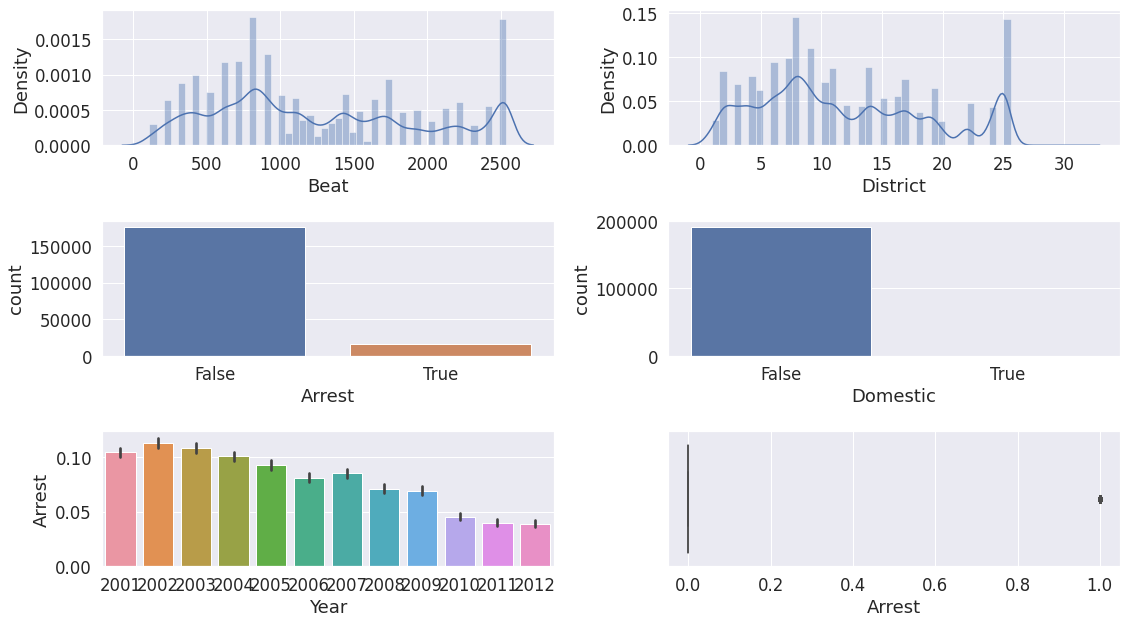

In [38]:
fig = plt.figure(figsize=(16,9))

plt.subplot(3,2,1)
sns.distplot(data.Beat)
plt.subplot(3,2,2)
sns.distplot(data.District)
plt.subplot(3,2,3)
sns.countplot(x=data['Arrest'])
plt.subplot(3,2,4)
sns.countplot(x=data['Domestic'])
plt.subplot(3,2,5)
sns.barplot(x=data['Year'],y=data['Arrest'])
plt.subplot(3,2,6)
sns.boxplot(x=data['Arrest'])
plt.tight_layout()
plt.show()

In [39]:
data.corr()

,ID,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
ID,1.000000,-0.090864,0.030879,-0.002225,0.023583,-0.018847,0.995614,0.012860,-0.015327
Arrest,-0.090864,1.000000,0.012896,-0.001383,-0.004103,-0.002877,-0.090279,0.002548,0.001872
Domestic,0.030879,0.012896,1.000000,-0.007283,-0.007929,0.002780,0.031091,-0.005150,-0.001359
Beat,-0.002225,-0.001383,-0.007283,1.000000,0.912558,-0.554523,-0.003057,0.673023,-0.508829
District,0.023583,-0.004103,-0.007929,0.912558,1.000000,-0.548129,0.022974,0.695115,-0.603074
CommunityArea,-0.018847,-0.002877,0.002780,-0.554523,-0.548129,1.000000,-0.018513,-0.804382,0.320244
Year,0.995614,-0.090279,0.031091,-0.003057,0.022974,-0.018513,1.000000,0.012154,-0.014208
Latitude,0.012860,0.002548,-0.005150,0.673023,0.695115,-0.804382,0.012154,1.000000,-0.581734
Longitude,-0.015327,0.001872,-0.001359,-0.508829,-0.603074,0.320244,-0.014208,-0.581734,1.000000


###Time series

In [40]:
pd.date_range(start='2012-12-01',end='2012-12-31')

DatetimeIndex(['2012-12-01', '2012-12-02', '2012-12-03', '2012-12-04',
               '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-08',
               '2012-12-09', '2012-12-10', '2012-12-11', '2012-12-12',
               '2012-12-13', '2012-12-14', '2012-12-15', '2012-12-16',
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-22', '2012-12-23', '2012-12-24',
               '2012-12-25', '2012-12-26', '2012-12-27', '2012-12-28',
               '2012-12-29', '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='D')

In [41]:
data.isnull().sum()

ID                         0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43056
CommunityArea          24616
Year                       0
Latitude                2276
Longitude               2276
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
data.shape

(191641, 10)

# Data Preprocessing

## Treat missing values 

In [44]:
data.isnull().sum()

ID                         0
LocationDescription        0
Arrest                     0
Domestic                   0
Beat                       0
District               43056
CommunityArea          24616
Year                       0
Latitude                2276
Longitude               2276
dtype: int64

In [45]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)
imputer.fit(data)
data=imputer.transform(data)

In [46]:
data.isnull().sum()

ID                     0
LocationDescription    0
Arrest                 0
Domestic               0
Beat                   0
District               0
CommunityArea          0
Year                   0
Latitude               0
Longitude              0
dtype: int64

## Treat duplicate values

In [47]:

data.duplicated(keep='first').sum()

0

## Target label is ARREST

In [48]:
df = data[['Domestic','Beat','District','CommunityArea', 'Arrest']]

In [49]:
df

,Domestic,Beat,District,CommunityArea,Arrest
Date,,,,,
2012-12-31 23:15:00,False,623,6.0,69.0,False
2012-12-31 22:00:00,False,1213,12.0,24.0,False
2012-12-31 22:00:00,False,1622,16.0,11.0,False
2012-12-31 22:00:00,False,724,7.0,67.0,False
2012-12-31 21:30:00,False,211,2.0,35.0,False
...,...,...,...,...,...
2001-01-01 00:05:00,False,1123,10.0,32.0,False
2001-01-01 00:01:00,False,2023,10.0,32.0,False
2001-01-01 00:01:00,False,911,10.0,32.0,False


In [50]:
encoder = LabelEncoder()

In [51]:
df['Arrest'] = encoder.fit_transform(df['Arrest'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df['Arrest'].value_counts()

0    176105
1     15536
Name: Arrest, dtype: int64

In [53]:
df2 = pd.get_dummies(df,columns=['Domestic'],drop_first=True)

In [54]:
df3 = df2[['Beat','District','CommunityArea','Domestic_True','Arrest']]

In [55]:
df3

,Beat,District,CommunityArea,Domestic_True,Arrest
Date,,,,,
2012-12-31 23:15:00,623,6.0,69.0,0,0
2012-12-31 22:00:00,1213,12.0,24.0,0,0
2012-12-31 22:00:00,1622,16.0,11.0,0,0
2012-12-31 22:00:00,724,7.0,67.0,0,0
2012-12-31 21:30:00,211,2.0,35.0,0,0
...,...,...,...,...,...
2001-01-01 00:05:00,1123,10.0,32.0,0,0
2001-01-01 00:01:00,2023,10.0,32.0,0,0
2001-01-01 00:01:00,911,10.0,32.0,0,0


# Model training

In [56]:
X = df3.iloc[:,0:4]
y = df3.iloc[:,4]

In [57]:
data.shape

(191641, 10)

In [58]:
X.values, y.values

(array([[ 623.,    6.,   69.,    0.],
        [1213.,   12.,   24.,    0.],
        [1622.,   16.,   11.,    0.],
        ...,
        [ 911.,   10.,   32.,    0.],
        [1712.,   10.,   32.,    0.],
        [1911.,   10.,   32.,    0.]]), array([0, 0, 0, ..., 0, 0, 0]))

In [59]:
scalar = StandardScaler()

In [60]:
X_scaled = scalar.fit_transform(X)

In [61]:
X_scaled

array([[-0.90503183, -0.87532813,  1.57969539, -0.04658548],
       [-0.0652084 ,  0.09561339, -0.6577455 , -0.04658548],
       [ 0.51697427,  0.74290774, -1.30411732, -0.04658548],
       ...,
       [-0.49508412, -0.22803378, -0.25997823, -0.04658548],
       [ 0.64508293, -0.22803378, -0.25997823, -0.04658548],
       [ 0.92834541, -0.22803378, -0.25997823, -0.04658548]])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153312, 4), (38329, 4), (153312,), (38329,))

## Using XGBoost

Introduction to XGboost : https://medium.com/xgboost-all-you-need-to-know

In [64]:
xgb = XGBClassifier(random_state=0, n_estimators=400, objective='binary:logistic')

In [66]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='auc',early_stopping_rounds=20)

[0]	validation_0-auc:0.567226
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.567226
[2]	validation_0-auc:0.566851
[3]	validation_0-auc:0.573379
[4]	validation_0-auc:0.579306
[5]	validation_0-auc:0.578205
[6]	validation_0-auc:0.577338
[7]	validation_0-auc:0.578951
[8]	validation_0-auc:0.57815
[9]	validation_0-auc:0.578793
[10]	validation_0-auc:0.57882
[11]	validation_0-auc:0.579683
[12]	validation_0-auc:0.578882
[13]	validation_0-auc:0.579345
[14]	validation_0-auc:0.578557
[15]	validation_0-auc:0.578357
[16]	validation_0-auc:0.578724
[17]	validation_0-auc:0.57932
[18]	validation_0-auc:0.580234
[19]	validation_0-auc:0.57975
[20]	validation_0-auc:0.57991
[21]	validation_0-auc:0.581685
[22]	validation_0-auc:0.582138
[23]	validation_0-auc:0.582063
[24]	validation_0-auc:0.581863
[25]	validation_0-auc:0.582338
[26]	validation_0-auc:0.582067
[27]	validation_0-auc:0.582268
[28]	validation_0-auc:0.582613
[29]	validation_0-auc:0.582881
[30]	validation_0-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
y_pred = xgb.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     35181
           1       0.00      0.00      0.00      3148

    accuracy                           0.92     38329
   macro avg       0.46      0.50      0.48     38329
weighted avg       0.84      0.92      0.88     38329



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


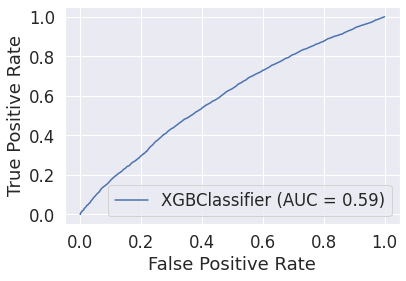

In [70]:
plot_roc_curve(xgb,X_test,y_test)